# Identifying high flyers

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.tree import DecisionTreeClassifier
random.seed(365)

In [2]:
# Globals
PCT_TRAIN = 0.6
N_ITERS = 50

In [3]:
# Function to fit a regression tree to data

def train_test_eval(features, labels, trial_name, print_output=False):
    
    # Math to split into train / test
    n_rows = features.shape[0]
    n_rows_training = round(PCT_TRAIN * n_rows)
    random_index = list(range(n_rows))
    
    # Track feature importance throughout the iterations
    all_feature_importance = {}
    for feature_name in list(features):
        all_feature_importance[feature_name] = []
        
    # Track MCR throughout the iterations
    mcrs = []

    # Fit the tree several times
    for i in range(N_ITERS):

        random.shuffle(random_index)

        # Get training data
        train_index = random_index[: n_rows_training]
        train_features = features.iloc[train_index]
        train_labels = labels[train_index]

        # Get test data
        test_index = random_index[n_rows_training :]
        test_features = features.loc[test_index]
        test_labels = labels[test_index]

        # Create a tree using the training data
        tree = DecisionTreeClassifier()
        tree.fit(train_features, train_labels)

        # Predict on the test data
        predicted_labels = tree.predict(test_features)

        # Calculate how well it performed (MCR)
        n_wrong = sum(test_labels != predicted_labels)
        mcr = n_wrong / len(test_labels)
        mcrs.append(mcr)
        
        # Calculate feature importances
        for (feature_name, importance) in zip(list(features), tree.feature_importances_):
            all_feature_importance[feature_name].append(importance)

        # Print out the results
        if print_output:
            s = "Trial #{}: Misclassified {} of {} points | MCR = {}"
            print(s.format(i + 1, n_wrong, len(test_labels), mcr))

    # Create and save a plot of feature importance
    df = pd.DataFrame(all_feature_importance)
    plt.figure(figsize=(11, 8))
    plt.subplot(212)
    for i in range(N_ITERS):
        plt.scatter(df.columns, df.loc[i], s=10, c="black")
    plt.title("Feature Importance, trial={}".format(trial_name))
    plt.savefig("plots/{}_feat.png".format(trial_name))
    
    # Create and save a plot of MCRs
    plt.figure(figsize=(11, 8))
    plt.hist(mcrs)
    plt.title("Histogram of MCRs, trial={}".format(trial_name))
    plt.savefig("plots/{}_hist.png".format(trial_name))
        
    return

## `baseline.csv` data

In [4]:
# Data cleaning

# Some columns / rows have too many NAs
baseline = pd.read_csv("data/baseline.csv")
baseline.drop(axis="columns", labels=["rec_attended_school", "dist_food_market"], inplace=True)
baseline.dropna(axis="index", how="any", inplace=True)
baseline.reset_index(inplace=True)
baseline.drop(axis="columns", labels=["index"], inplace=True)

# Recode 
baseline = baseline.replace("Willing to wait at least once", "1")
baseline = baseline.replace("Never willing to wait", "0")
baseline = baseline.astype({"imp_dich": "int32"})

### `HF2` as label

Trial #1: Misclassified 48 of 296 points | MCR = 0.16216216216216217
Trial #2: Misclassified 51 of 296 points | MCR = 0.17229729729729729
Trial #3: Misclassified 58 of 296 points | MCR = 0.19594594594594594
Trial #4: Misclassified 52 of 296 points | MCR = 0.17567567567567569
Trial #5: Misclassified 46 of 296 points | MCR = 0.1554054054054054
Trial #6: Misclassified 53 of 296 points | MCR = 0.17905405405405406
Trial #7: Misclassified 40 of 296 points | MCR = 0.13513513513513514
Trial #8: Misclassified 49 of 296 points | MCR = 0.16554054054054054
Trial #9: Misclassified 55 of 296 points | MCR = 0.1858108108108108
Trial #10: Misclassified 46 of 296 points | MCR = 0.1554054054054054
Trial #11: Misclassified 51 of 296 points | MCR = 0.17229729729729729
Trial #12: Misclassified 45 of 296 points | MCR = 0.15202702702702703
Trial #13: Misclassified 43 of 296 points | MCR = 0.14527027027027026
Trial #14: Misclassified 52 of 296 points | MCR = 0.17567567567567569
Trial #15: Misclassified 45 of 2

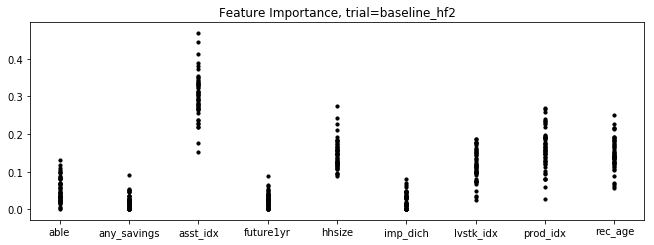

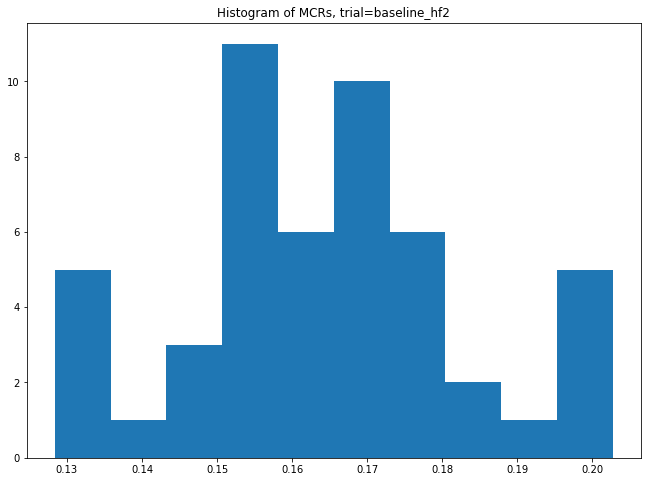

In [5]:
# Fit a basic classification tree to the baseline data with HF2 as labels

features = baseline[[
    "hhsize", "able", "rec_age", "imp_dich", "future1yr",
    "asst_idx", "lvstk_idx", "prod_idx", "any_savings"]]

labels = baseline["HF2"]

train_test_eval(features, labels, "baseline_hf2")

### `HF3` as label

Trial #1: Misclassified 129 of 296 points | MCR = 0.4358108108108108
Trial #2: Misclassified 112 of 296 points | MCR = 0.3783783783783784
Trial #3: Misclassified 113 of 296 points | MCR = 0.38175675675675674
Trial #4: Misclassified 111 of 296 points | MCR = 0.375
Trial #5: Misclassified 111 of 296 points | MCR = 0.375
Trial #6: Misclassified 104 of 296 points | MCR = 0.35135135135135137
Trial #7: Misclassified 108 of 296 points | MCR = 0.36486486486486486
Trial #8: Misclassified 109 of 296 points | MCR = 0.36824324324324326
Trial #9: Misclassified 103 of 296 points | MCR = 0.34797297297297297
Trial #10: Misclassified 111 of 296 points | MCR = 0.375
Trial #11: Misclassified 118 of 296 points | MCR = 0.39864864864864863
Trial #12: Misclassified 119 of 296 points | MCR = 0.40202702702702703
Trial #13: Misclassified 107 of 296 points | MCR = 0.3614864864864865
Trial #14: Misclassified 113 of 296 points | MCR = 0.38175675675675674
Trial #15: Misclassified 106 of 296 points | MCR = 0.3581081

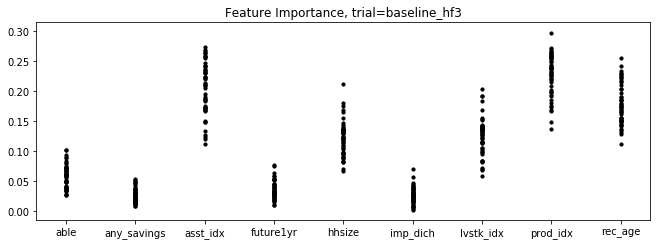

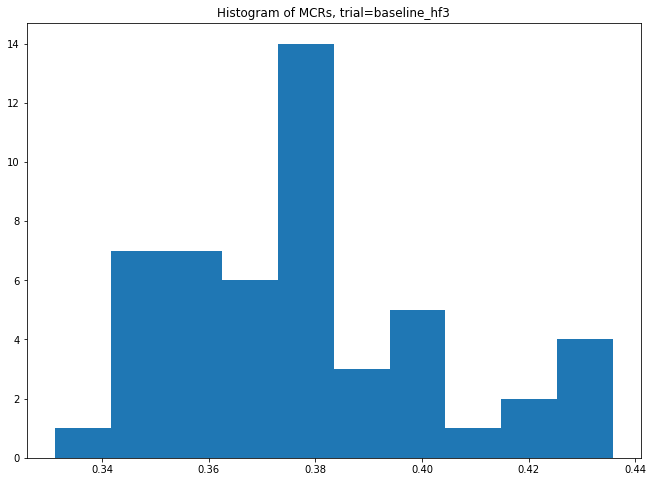

In [6]:
# Fit a basic classification tree to the baseline data with HF3 as labels

features = baseline[[
    "hhsize", "able", "rec_age", "imp_dich", "future1yr",
    "asst_idx", "lvstk_idx", "prod_idx", "any_savings"]]

labels = baseline["HF3"]

train_test_eval(features, labels, "baseline_hf3")

## `denver.csv` data

In [7]:
# Data cleaning

# Some rows have NAs
denver = pd.read_csv("data/denver.csv")
denver.dropna(axis="index", how="any", inplace=True)
denver.reset_index(inplace=True)
denver.drop(axis="columns", labels=["index"], inplace=True)

### `HF2` as labels

Trial #1: Misclassified 48 of 304 points | MCR = 0.15789473684210525
Trial #2: Misclassified 55 of 304 points | MCR = 0.18092105263157895
Trial #3: Misclassified 52 of 304 points | MCR = 0.17105263157894737
Trial #4: Misclassified 50 of 304 points | MCR = 0.16447368421052633
Trial #5: Misclassified 53 of 304 points | MCR = 0.17434210526315788
Trial #6: Misclassified 49 of 304 points | MCR = 0.1611842105263158
Trial #7: Misclassified 54 of 304 points | MCR = 0.17763157894736842
Trial #8: Misclassified 54 of 304 points | MCR = 0.17763157894736842
Trial #9: Misclassified 44 of 304 points | MCR = 0.14473684210526316
Trial #10: Misclassified 60 of 304 points | MCR = 0.19736842105263158
Trial #11: Misclassified 50 of 304 points | MCR = 0.16447368421052633
Trial #12: Misclassified 52 of 304 points | MCR = 0.17105263157894737
Trial #13: Misclassified 48 of 304 points | MCR = 0.15789473684210525
Trial #14: Misclassified 57 of 304 points | MCR = 0.1875
Trial #15: Misclassified 50 of 304 points |

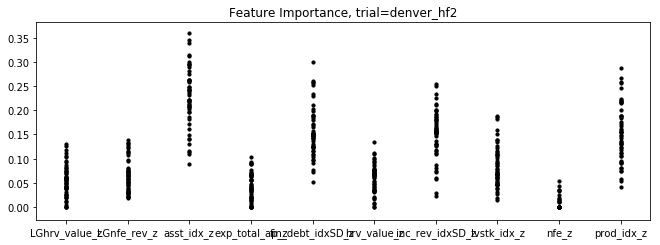

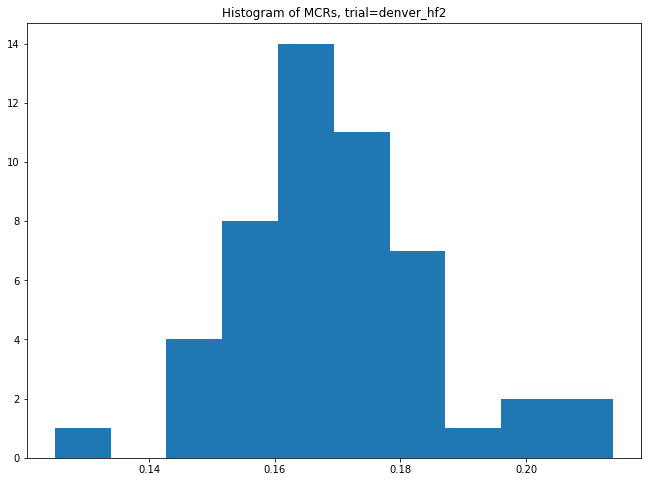

In [8]:
# Fit a basic classification tree to the denver data with HF2 as labels

features = denver[[
    "asst_idx_z", "lvstk_idx_z", "prod_idx_z", "hrv_value_z",
    "LGhrv_value_z", "exp_total_ap_z", "LGnfe_rev_z",
    "nfe_z", "inc_rev_idxSD_z", "fin_debt_idxSD_z"]]

labels = denver["HF2"]

train_test_eval(features, labels, "denver_hf2")

### `HF3` as labels

Trial #1: Misclassified 106 of 304 points | MCR = 0.34868421052631576
Trial #2: Misclassified 101 of 304 points | MCR = 0.33223684210526316
Trial #3: Misclassified 106 of 304 points | MCR = 0.34868421052631576
Trial #4: Misclassified 116 of 304 points | MCR = 0.3815789473684211
Trial #5: Misclassified 112 of 304 points | MCR = 0.3684210526315789
Trial #6: Misclassified 113 of 304 points | MCR = 0.3717105263157895
Trial #7: Misclassified 95 of 304 points | MCR = 0.3125
Trial #8: Misclassified 103 of 304 points | MCR = 0.33881578947368424
Trial #9: Misclassified 105 of 304 points | MCR = 0.34539473684210525
Trial #10: Misclassified 117 of 304 points | MCR = 0.3848684210526316
Trial #11: Misclassified 114 of 304 points | MCR = 0.375
Trial #12: Misclassified 116 of 304 points | MCR = 0.3815789473684211
Trial #13: Misclassified 110 of 304 points | MCR = 0.3618421052631579
Trial #14: Misclassified 109 of 304 points | MCR = 0.35855263157894735
Trial #15: Misclassified 105 of 304 points | MCR 

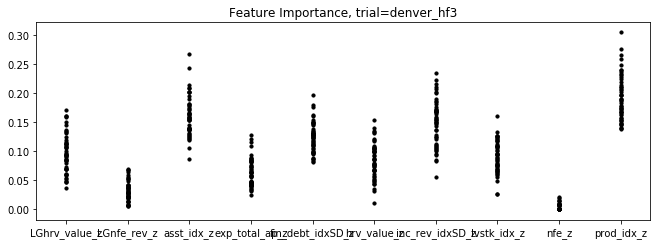

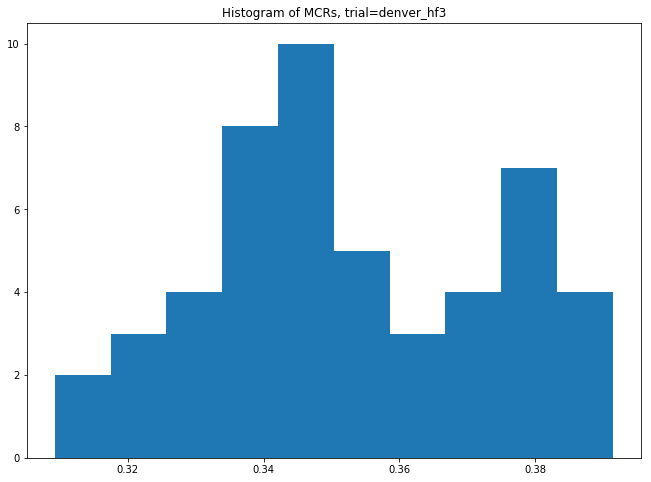

In [9]:
# Fit a basic classification tree to the denver data with HF3 as labels

features = denver[[
    "asst_idx_z", "lvstk_idx_z", "prod_idx_z", "hrv_value_z",
    "LGhrv_value_z", "exp_total_ap_z", "LGnfe_rev_z",
    "nfe_z", "inc_rev_idxSD_z", "fin_debt_idxSD_z"]]

labels = denver["HF3"]

train_test_eval(features, labels, "denver_hf3")